## Import libraries and init

In [1]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

Welcome to JupyROOT 6.12/04


In [2]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

## Load ntuples from analyzer

In [3]:
masses = [('60','20'),('6p0','2p0'),('52p5','5p0'),('5p25','0p5')]
ctaus = [10]#, 10, 100, 1000]
cuts = np.arange(0,7)
# triggerPath = 'TRIG_dsa_HLT_DoubleMu3_DCA_PFMET50_PFMHT60'
branchPath = 'SREffi_dsa'
baseDir = '../Firefighter/washAOD/'
fileName = lambda Mchi, dMchi, ctau: baseDir + f'Mchi-{Mchi}_dMchi-{dMchi}_ctau-{ctau}.root'

numParams = len(masses)*len(ctaus)
countMasses = 0

dfs = OrderedDict({})
numEvents = OrderedDict({})
for (Mchi, dMchi) in masses:
    countCtaus = 1
    dfs[Mchi] = OrderedDict({})
    numEvents[Mchi] = OrderedDict({})
    for ctau in ctaus:
        dfs[Mchi][ctau] = OrderedDict({})
        for cut in cuts:
            dfs[Mchi][ctau][cut] = uproot.open(fileName(Mchi, dMchi, ctau))[branchPath + f'/cut{cut}'].pandas.df()
        print(f'{countMasses*len(ctaus)+countCtaus} of {numParams}: ' + fileName(Mchi, dMchi, ctau))
        countCtaus += 1
    countMasses += 1

1 of 4: ../Firefighter/washAOD/Mchi-60_dMchi-20_ctau-10.root
2 of 4: ../Firefighter/washAOD/Mchi-6p0_dMchi-2p0_ctau-10.root
3 of 4: ../Firefighter/washAOD/Mchi-52p5_dMchi-5p0_ctau-10.root
4 of 4: ../Firefighter/washAOD/Mchi-5p25_dMchi-0p5_ctau-10.root


## Inspect data

In [132]:
dfs['60'][10][0]

nMatched     recoPt   recoEta   recoPhi     recoDxy  \
entry  subentry                                                            
0      0         1.768190e+09        NaN       NaN       NaN         NaN   
1      0         1.768190e+09        NaN       NaN       NaN         NaN   
2      0         1.768190e+09        NaN       NaN       NaN         NaN   
3      0         1.768190e+09        NaN       NaN       NaN         NaN   
4      0         1.768190e+09        NaN       NaN       NaN         NaN   
5      0         1.768190e+09   5.843535  0.229218 -2.584570  -13.514310   
       1                  NaN   3.856074 -1.253744 -1.601027   12.177310   
6      0         1.768190e+09        NaN       NaN       NaN         NaN   
7      0         1.768190e+09  10.484906  0.167385  2.656514  -16.335144   
       1                  NaN   7.806180 -0.128355 -2.323238    9.406816   
8      0         1.768190e+09  18.600212 -1.613866  2.272897    0.178617   
       1                  NaN   9.521345 -1.246799  2.509227  -25.841015   
9      0         1.768190e+09        NaN       NaN       NaN         NaN   
10     0         1.768190e+09  42.184544  1.413850  0.140655    2.255691   
       1                  NaN   7.641394  1.813103  1.142460   -8.844950   
11     0         1.768190e+09  12.539191 -1.640953 -2.231562   16.955637   
       1                  NaN   1.545061 -2.131961  0.491979  -73.268776   
12     0         1.768190e+09        NaN       NaN       NaN         NaN   
13     0         1.768190e+09  13.879442 -0.049944  2.986505    3.297366   
       1                  NaN   1.546637 -2.320840  1.025235   -3.695997   
14     0         1.768190e+09        NaN       NaN       NaN         NaN   
15     0         1.768190e+09        NaN       NaN       NaN         NaN   
16     0         1.768190e+09  31.083832 -0.044152  0.358526 -101.225700   
       1                  NaN  10.629558  0.950457  1.724776 -387.301697   
17     0         1.768190e+09  27.565344 -1.800208 -1.456775    2.237599   
       1                  NaN   4.454407 -0.421449 -0.578069  -29.714153   
18     0         1.768190e+09  12.091399 -1.359097 -1.027851   88.424759   
       1                  NaN   5.151365 -2.164267 -0.748993    1.430902   
19     0         1.768190e+09        NaN       NaN       NaN         NaN   
20     0         1.768190e+09  14.418169 -1.779281 -1.959050   -4.420464   
...                       ...        ...       ...       ...         ...   
132042 0         1.768190e+09        NaN       NaN       NaN         NaN   
132043 0         1.768190e+09   3.454606 -2.287600  2.231252  -17.491440   
       1                  NaN   1.822167 -2.266094  2.366870  -18.199965   
132044 0         1.768190e+09        NaN       NaN       NaN         NaN   
132045 0         1.768190e+09   7.959404 -0.315684  1.135785   -8.877489   
       1                  NaN   4.120564 -0.685414 -2.676218    2.775745   
132046 0         1.768190e+09        NaN       NaN       NaN         NaN   
132047 0         1.768190e+09        NaN       NaN       NaN         NaN   
132048 0         1.768190e+09   8.660075 -1.617062 -1.126863    4.822835   
       1                  NaN   5.130798 -2.325661 -1.245475   -3.360982   
132049 0         1.768190e+09   6.639781  0.917679 -1.798931  -16.045412   
       1                  NaN   6.534129  1.570395 -1.560516   -2.489248   
132050 0         1.768190e+09        NaN       NaN       NaN         NaN   
132051 0         1.768190e+09  12.022597  0.542208  2.155494   32.626247   
       1                  NaN   3.931182 -0.165990  0.147646   34.541870   
132052 0         1.768190e+09   5.499141 -0.691199 -2.402755   -7.758536   
       1                  NaN   2.820882 -1.125576 -1.930033   37.613491   
132053 0         1.768190e+09        NaN       NaN       NaN         NaN   
132054 0         1.768190e+09        NaN       NaN       NaN         NaN   
132055 0         1.768190e+09   9.521783 -0.988779 -1.797626    5.909

## Plot everything together

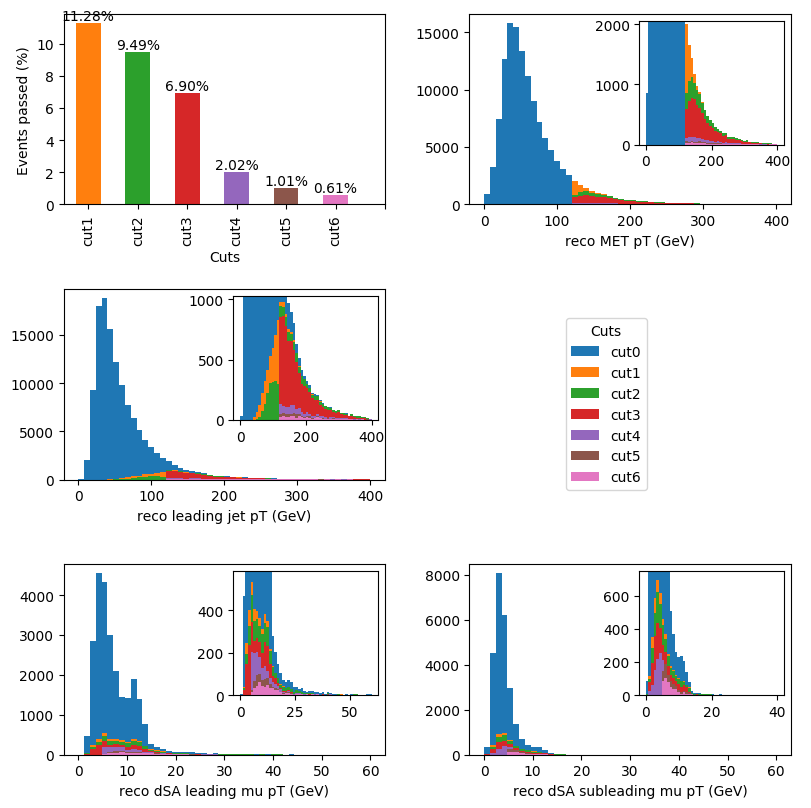

In [136]:
mchi = '52p5'
insets = True
build='stepfilled'
iheight="65%"
iwidth="45%"

### Make subplot axes
fig, axes = plt.subplots(3,2, figsize=(8,8))
# fig.suptitle("Signal region efficiency for m1 = 50 GeV, m2 = 55 GeV")
# fig.subplots_adjust(top=0.92)
plt.tight_layout(h_pad=4.0, w_pad=3.0)
axes[1, 1].axis('off')

# labels = [['(50, 70) GeV', '(50, 55) GeV'], \
#           [ '(5, 7) GeV', '(5, 5.5) GeV']]

# ranges = [[[0,3000], [0,3000]], \
#           [[0,500], [0,500]]]

# variables = [['60', '52p5'], \
#              ['6p0', '5p25']]

# properties = {'bins':50, 'density':True, 'log':True, 'alpha':0.5}

### Histogram cut-flow of passing events 
counts = []
for cut in cuts:
    count = len(dfs[mchi][10][cut]['recoPFMetPt'])
    norm = len(dfs[mchi][10][0]['recoPFMetPt'])
    counts.append(100*count/norm)
axlabels = [f'cut{cut}' for cut in cuts[1:]]
countseries = pd.Series.from_array(counts[1:])

axes[0,0] = countseries.plot(ax=axes[0,0],kind='bar',color=['C1','C2','C3','C4','C5','C6'])
axes[0,0].set_xlabel('Cuts')
axes[0,0].set_ylabel('Events passed (%)')
axes[0,0].set_xticklabels(axlabels)
axes[0,0].set_xticks(np.arange(0,7))

rects = axes[0,0].patches

labels = ["%.2f%%" % counts[i] for i in np.arange(1,len(rects)+1)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes[0,0].text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

    
### reco MET pT
axes[0,1].set_xlabel('reco MET pT (GeV)')
for cut in cuts:
    axes[0,1].hist(dfs[mchi][10][cut]['recoPFMetPt'].dropna(),bins=50,range=(0,400),label=f'cut{cut}',histtype=build)
if insets:
    axins = inset_axes(axes[0,1],width=iwidth, height=iheight)
    for cut in cuts:
        ret = axins.hist(dfs[mchi][10][cut]['recoPFMetPt'].dropna(),bins=50,range=(0,400),histtype=build)
        if cut == 1:
            axins.set_ylim(0,max(ret[0]+50))

### reco leading jet pT
axes[1,0].set_xlabel('reco leading jet pT (GeV)')
for cut in cuts:
    axes[1,0].hist(dfs[mchi][10][cut]['recoPFJetPt'].dropna(),bins=50,range=(0,400),histtype=build)
if insets:
    axins = inset_axes(axes[1,0],width=iwidth, height=iheight)
    for cut in cuts:
        ret = axins.hist(dfs[mchi][10][cut]['recoPFJetPt'].dropna(),bins=50,range=(0,400),histtype=build)
        if cut == 1:
            axins.set_ylim(0,max(ret[0]+50))

### reco dSA leading muon pT
axes[2,0].set_xlabel('reco dSA leading mu pT (GeV)')
for cut in cuts:
    axes[2,0].hist(dfs[mchi][10][cut].query('subentry==0')['recoPt'].dropna(),bins=50,range=(0,60),histtype=build)
if insets:
    axins = inset_axes(axes[2,0],width=iwidth, height=iheight)
    for cut in cuts:
        ret = axins.hist(dfs[mchi][10][cut].query('subentry==0')['recoPt'].dropna(),bins=50,range=(0,60),histtype=build)
        if cut == 1:
            axins.set_ylim(0,max(ret[0]+50))

### reco dSA subleading muon pT
axes[2,1].set_xlabel('reco dSA subleading mu pT (GeV)')
for cut in cuts:
    axes[2,1].hist(dfs[mchi][10][cut].query('subentry==1')['recoPt'].dropna(),bins=50,range=(0,60),histtype=build)
if insets:
    axins = inset_axes(axes[2,1],width=iwidth, height=iheight)
    for cut in cuts:
        ret = axins.hist(dfs[mchi][10][cut].query('subentry==1')['recoPt'].dropna(),bins=50,range=(0,40),histtype=build)
        if cut == 1:
            axins.set_ylim(0,max(ret[0]+50))
    
### Make and place legend w.r.t. axis[0,1] (upper right)
axes[0,1].legend(loc=(0.3,-1.5), title='Cuts')

## Separate plots

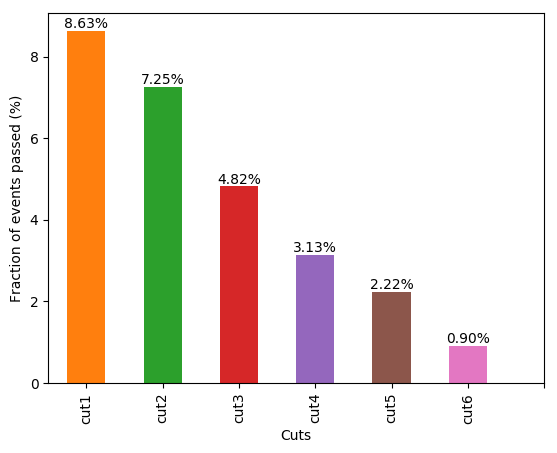

In [23]:
counts = []
for cut in cuts:
    count = len(dfs['60'][10][cut]['recoPFMetPt'])
    norm = len(dfs['60'][10][0]['recoPFMetPt'])
    counts.append(100*count/norm)

axlabels = [f'cut{cut}' for cut in cuts[1:]]

countseries = pd.Series.from_array(counts[1:])

ax = countseries.plot(kind='bar',color=['C1','C2','C3','C4','C5','C6'])
ax.set_xlabel('Cuts')
ax.set_ylabel('Fraction of events passed (%)')
ax.set_xticklabels(axlabels)
ax.set_xticks(np.arange(0,7))

rects = ax.patches

labels = ["%.2f%%" % counts[i] for i in np.arange(1,len(rects)+1)]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

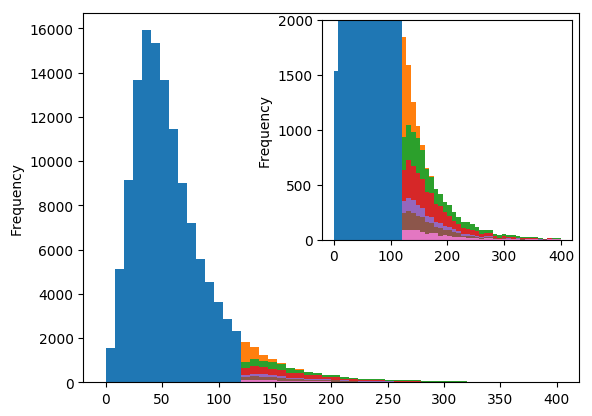

In [36]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['60'][10][cut]['recoPFMetPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,400))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['60'][10][cut]['recoPFMetPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,2000),range=(0,400))

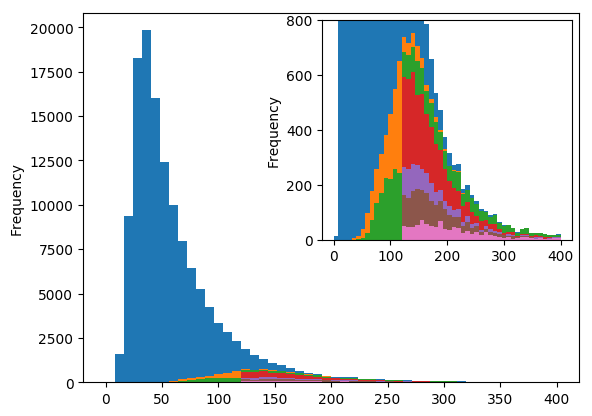

In [42]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['60'][10][cut]['recoPFJetPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,400))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['60'][10][cut]['recoPFJetPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,800),range=(0,400))

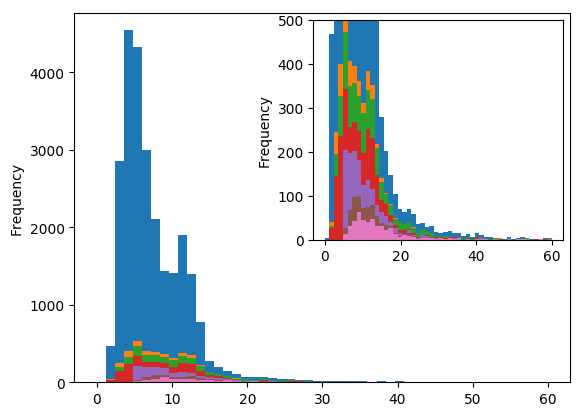

In [34]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['52p5'][10][cut].query('subentry==0')['recoPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,60))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['52p5'][10][cut].query('subentry==0')['recoPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,500),range=(0,60))

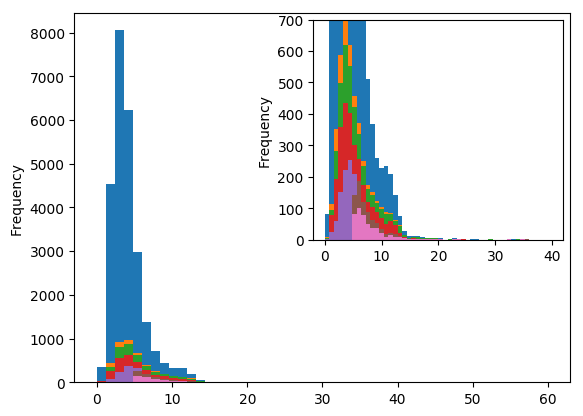

In [35]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['52p5'][10][cut].query('subentry==1')['recoPt'].dropna().plot.hist(ax=ax,bins=50,range=(0,60))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['52p5'][10][cut].query('subentry==1')['recoPt'].dropna().plot.hist(ax=axins,bins=50,ylim=(0,700),range=(0,40))

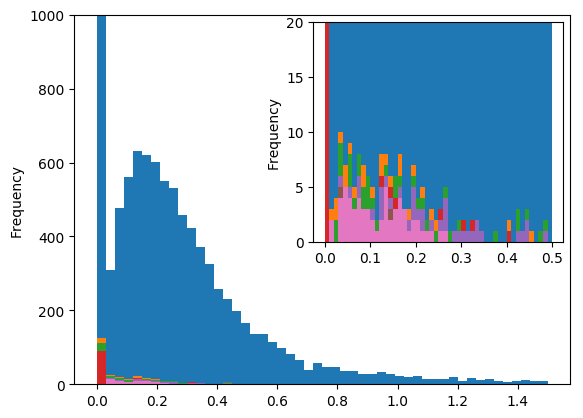

In [147]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['6p0'][10][cut]['deltaR'].plot.hist(bins=50,range=(0,1.5),ylim=(0,1000))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['6p0'][10][cut]['deltaR'].plot.hist(bins=50,range=(0,0.5),ylim=(0,20))

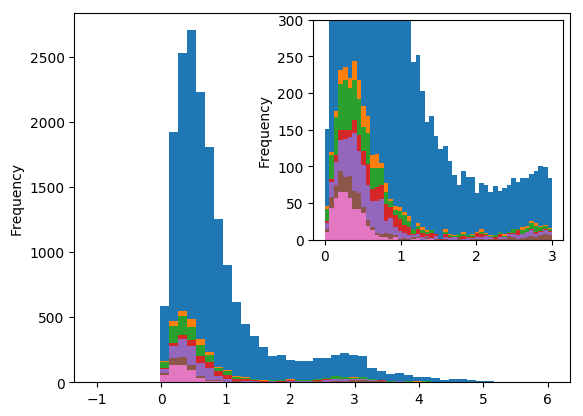

In [38]:
fig,ax = plt.subplots(1,1)
for cut in cuts:
    dfs['52p5'][10][cut]['deltaR'].plot.hist(bins=50, range=(0,6))
axins = inset_axes(ax,width=2.5, height=2.2)
for cut in cuts:
    dfs['52p5'][10][cut]['deltaR'].plot.hist(bins=50,range=(0,3.0),ylim=(0,300))